In [18]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [29]:
#Creating a synthetic health dataset
# Set random seed for reproducibility
np.random.seed(100)

# Generate synthetic health data
num_samples = 1000

# Create realistic health features
age = np.random.randint(18, 70, size=num_samples)
weight = np.random.randint(40, 100, size=num_samples)  # weight in kg
height = np.random.randint(150, 200, size=num_samples)  # height in cm
bp_systolic = np.random.randint(90, 180, size=num_samples)  # systolic blood pressure
bp_diastolic = np.random.randint(60, 120, size=num_samples)  # diastolic blood pressure
cholesterol = np.random.randint(100, 300, size=num_samples)  # cholesterol level
exercise_freq = np.random.randint(0, 7, size=num_samples)  # days of exercise per week

# Generate classification labels
y = np.random.randint(0, 3, size=num_samples)  # three classes for health_condition
health_data = pd.DataFrame({
    'age': age,
    'weight': weight,
    'height': height,
    'bp_systolic': bp_systolic,
    'bp_diastolic': bp_diastolic,
    'cholesterol': cholesterol,
    'exercise_freq': exercise_freq,
    'health_condition': y
})

# Add synthetic fitness levels and workout history
health_data['fitness_level'] = np.random.randint(1, 6, size=num_samples)
health_data['workout_history'] = np.random.choice(['Beginner', 'Intermediate', 'Advanced'], size=num_samples)

In [30]:
health_data.head()

,age,weight,height,bp_systolic,bp_diastolic,cholesterol,exercise_freq,health_condition,fitness_level,workout_history
0,26,77,199,136,102,163,2,2,5,Advanced
1,42,97,172,116,87,245,0,0,4,Intermediate
2,21,75,155,134,87,271,3,1,1,Beginner
3,57,79,157,137,108,280,4,1,4,Intermediate
4,41,66,186,92,62,193,1,0,5,Advanced


# **Variables in the Dataset**

**age:**

Type: Integer
Description: Age of the individual in years.
Range: 18 to 70 years
Significance: Age is a fundamental demographic variable that can influence health conditions and fitness levels.

**weight:**

Type: Integer
Description: Weight of the individual in kilograms.
Range: 50 to 100 kg
Significance: Weight can be an important indicator of overall health and is often used in calculating body mass index (BMI).

**height:**

Type: Integer
Description: Height of the individual in centimeters.
Range: 150 to 200 cm
Significance: Height is used alongside weight to calculate BMI, which helps in assessing whether an individual is underweight, normal weight, overweight, or obese.

**bp_systolic:**

Type: Integer
Description: Systolic blood pressure of the individual in mmHg.
Range: 90 to 180 mmHg
Significance: Systolic blood pressure is the pressure in the arteries when the heart beats and is a key indicator of cardiovascular health.

**bp_diastolic:**

Type: Integer
Description: Diastolic blood pressure of the individual in mmHg.
Range: 60 to 120 mmHg
Significance: Diastolic blood pressure is the pressure in the arteries when the heart is at rest between beats. It is also crucial for assessing cardiovascular health.

**cholesterol:**

Type: Integer
Description: Cholesterol level of the individual in mg/dL.
Range: 100 to 300 mg/dL
Significance: Cholesterol levels are critical for understanding the risk of heart disease and other cardiovascular conditions.

**exercise_freq:**

Type: Integer
Description: Frequency of exercise in days per week.
Range: 0 to 7 days per week
Significance: Regular exercise is a significant factor in maintaining good health and preventing various diseases.

**health_condition:**

Type: Integer
Description: Label indicating the health condition of the individual.
Range: 0, 1, or 2 (representing different health conditions)
Significance: This is the target variable for classification. Different classes represent different health conditions that the model aims to predict.

**fitness_level:**

Type: Integer
Description: Self-assessed fitness level of the individual.
Range: 1 to 5
Significance: Fitness level helps in personalizing workout recommendations and assessing overall physical fitness.

**workout_history:**

Type: Categorical (String)
Description: Experience level in workout routines.
Categories: 'Beginner', 'Intermediate', 'Advanced'
Significance: Indicates the individual's familiarity and experience with exercise routines, which is useful for tailoring workout recommendations

In [31]:
#Encoding and scaling data

health_data = pd.get_dummies(health_data, columns=['workout_history'], drop_first=True)

X = health_data.drop('health_condition', axis=1)
y = health_data['health_condition']


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

In [32]:
#Random Forest Classifier
# Train a classification model
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.35      0.46      0.40        65
           1       0.39      0.37      0.38        71
           2       0.38      0.28      0.32        64

    accuracy                           0.37       200
   macro avg       0.37      0.37      0.37       200
weighted avg       0.37      0.37      0.37       200



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


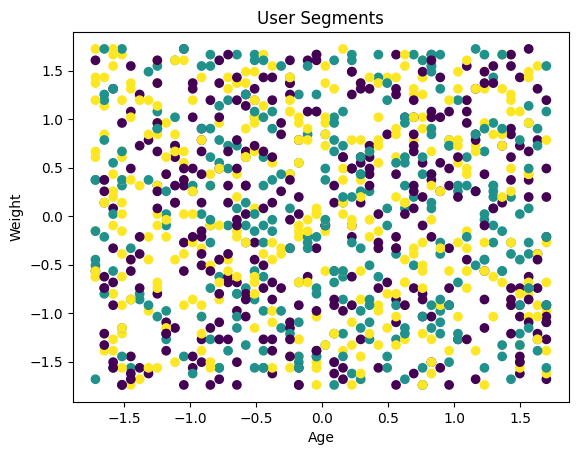

In [35]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=100)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
health_data['cluster'] = clusters

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('User Segments')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [37]:
# Simulate a recommendation system based on fitness levels and clusters

def recommend_workout(fitness_level, cluster):
    recommendations = {
        0: {1: 'Yoga', 2: 'HIIT', 3: 'Strength Training'},
        1: {1: 'Pilates', 2: 'Cardio', 3: 'CrossFit'},
        2: {1: 'Walking', 2: 'Cycling', 3: 'Swimming'}
    }
    return recommendations[cluster].get(fitness_level, 'General Workout') #Returning general workout for fitness level 4 and 5 by default

health_data['recommended_workout'] = health_data.apply(lambda row: recommend_workout(row['fitness_level'], row['cluster']), axis=1)

health_data[['fitness_level', 'cluster', 'recommended_workout']].head()


,fitness_level,cluster,recommended_workout
0,5,2,General Workout
1,4,0,General Workout
2,1,1,Pilates
3,4,0,General Workout
4,5,2,General Workout
